In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
data=pd.read_csv(r"C:\Users\hi\Downloads\Bakery_Sales_Data.csv")

In [61]:
data.shape

(20507, 5)

In [5]:
data["Transaction"].unique()

array([   1,    2,    3, ..., 9682, 9683, 9684], dtype=int64)

In [41]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


## Top 20 items purchased from the store

In [3]:
item=data.groupby('Item').count()


In [4]:
item1=item.sort_values(by='Transaction',ascending=False)
item1.head(20)

,Transaction,date_time,period_day,weekday_weekend
Item,,,,
Coffee,5471,5471,5471,5471
Bread,3325,3325,3325,3325
Tea,1435,1435,1435,1435
Cake,1025,1025,1025,1025
Pastry,856,856,856,856
Sandwich,771,771,771,771
Medialuna,616,616,616,616
Hot chocolate,590,590,590,590
Cookies,540,540,540,540


Text(0.5, 1.0, 'Top 20 items purchased from the store')

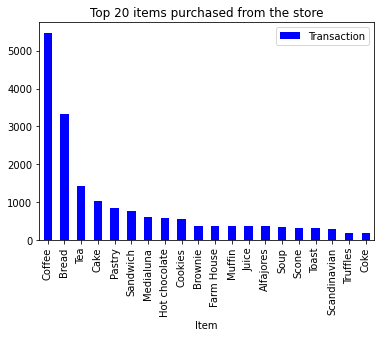

In [7]:

item2=item1.drop(["date_time","period_day","weekday_weekend"],axis=1)
item3=item2.head(20)
item3.plot.bar(color='blue')
plt.title("Top 20 items purchased from the store")


<module 'matplotlib.pyplot' from 'C:\\Users\\hi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

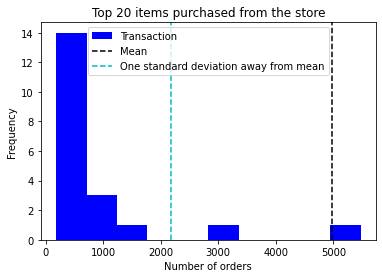

In [37]:
import statistics
d=data.Transaction.values.tolist()
m=statistics.mean(d)
sd=statistics.stdev(d)
item2=item1.drop(["date_time","period_day","weekday_weekend"],axis=1)
item3=item2.head(20)
item3.plot.hist(color="blue")
plt.title("Top 20 items purchased from the store")
plt.axvline(m,color='k',linestyle='dashed')
plt.axvline(m-sd,color='c',linestyle='dashed')
plt.xlabel("Number of orders")
plt.legend(["Transaction","Mean","One standard deviation away from mean"])
plt

## Orders received by month

In [114]:
data["date_time"]=pd.to_datetime(data["date_time"],format="%Y-%m-%d %H:%M:%S")
data["date_time"]
data["Month"]=data["date_time"].dt.month
data["Month"].value_counts()

3     3220
11    3076
1     3027
2     2748
12    2647
4     1048
10    1041
5      924
7      741
6      739
8      700
9      596
Name: month, dtype: int64

In [120]:
data['Month'] = data['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])
Month=data.groupby('Month').count()
Month1=Month.sort_values(by="Transaction",ascending=False)
Month1

,Transaction,Item,date_time,period_day,weekday_weekend,month
Month,,,,,,
March,3220,3220,3220,3220,3220,3220
November,3076,3076,3076,3076,3076,3076
January,3027,3027,3027,3027,3027,3027
February,2748,2748,2748,2748,2748,2748
December,2647,2647,2647,2647,2647,2647
April,1048,1048,1048,1048,1048,1048
October,1041,1041,1041,1041,1041,1041
May,924,924,924,924,924,924
July,741,741,741,741,741,741


<AxesSubplot:xlabel='Month'>

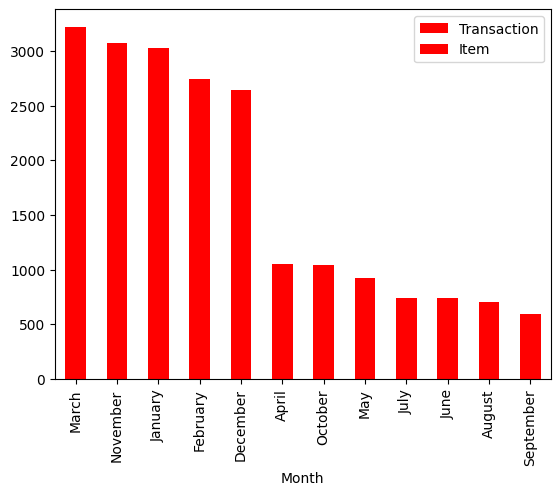

In [163]:
Month2=Month1.drop(["date_time","period_day","weekday_weekend","month","month"],axis=1)
Month2.plot.bar(color='red')

## Orders received each day in a week

In [130]:
data["day"]=data["date_time"].dt.dayofweek
data["day"]=data["day"].replace([0,1,2,3,4,5,6],['Monday','Tueday','Wednesday','Thuresday','Friday','Saturday','Sunday'])
day=data.groupby('day').count()
day1=day.sort_values(by='Transaction',ascending=False)
day1

,Transaction,Item,date_time,period_day,weekday_weekend,Month,month
day,,,,,,,
Saturday,3554,3554,3554,3554,3554,3554,3554
Friday,3266,3266,3266,3266,3266,3266,3266
Sunday,3118,3118,3118,3118,3118,3118,3118
Monday,3035,3035,3035,3035,3035,3035,3035
Tueday,2645,2645,2645,2645,2645,2645,2645
Thuresday,2601,2601,2601,2601,2601,2601,2601
Wednesday,2288,2288,2288,2288,2288,2288,2288


<AxesSubplot:xlabel='day'>

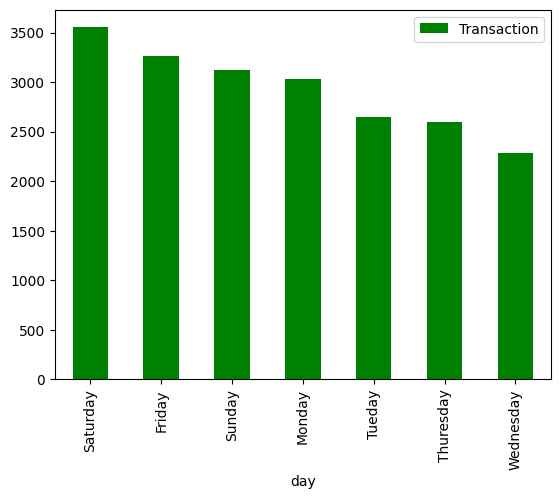

In [164]:
day2=day1.drop(["Item","date_time","period_day","weekday_weekend","Month","month"],axis=1)
day2.plot.bar(color='green')

## Orders received by hour of a day

In [133]:
data["hour"]=data["date_time"].dt.hour
hour=data.groupby("hour").count()
hour1=hour.sort_values(by="Transaction",ascending=False)
hour1                  
             
             

,Transaction,Item,date_time,period_day,weekday_weekend,Month,month,day
hour,,,,,,,,
11,3102,3102,3102,3102,3102,3102,3102,3102
12,2854,2854,2854,2854,2854,2854,2854,2854
10,2666,2666,2666,2666,2666,2666,2666,2666
14,2640,2640,2640,2640,2640,2640,2640,2640
13,2617,2617,2617,2617,2617,2617,2617,2617
15,2115,2115,2115,2115,2115,2115,2115,2115
9,1966,1966,1966,1966,1966,1966,1966,1966
16,1343,1343,1343,1343,1343,1343,1343,1343
8,645,645,645,645,645,645,645,645


<AxesSubplot:xlabel='hour'>

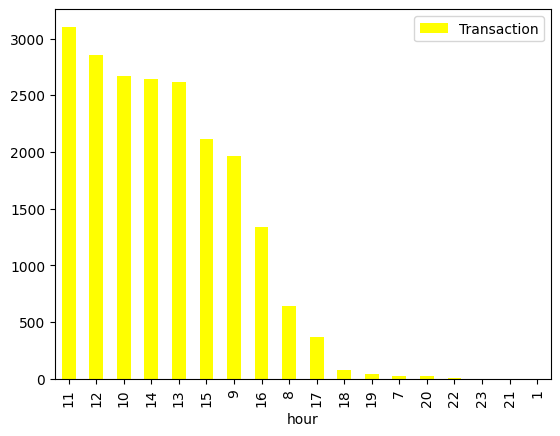

In [168]:
hour2=hour1.drop(["Item","date_time","period_day","weekday_weekend","Month","month","day"],axis=1)
hour2.plot.bar(color='yellow')

## Orders received by each period of a day

In [135]:
period=data.groupby("period_day").count()
period1=period.sort_values(by="Transaction",ascending=False)
period1                  
   

,Transaction,Item,date_time,weekday_weekend,Month,month,day,hour
period_day,,,,,,,,
afternoon,11569,11569,11569,11569,11569,11569,11569,11569
morning,8404,8404,8404,8404,8404,8404,8404,8404
evening,520,520,520,520,520,520,520,520
night,14,14,14,14,14,14,14,14


<AxesSubplot:xlabel='period_day'>

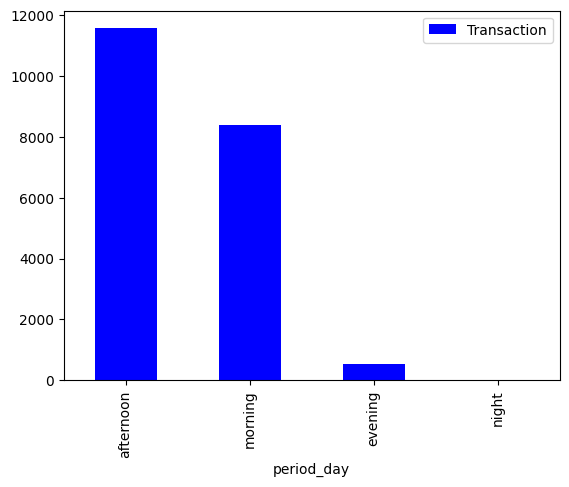

In [170]:
period2=period1.drop(["Item","date_time","weekday_weekend","Month","month","day","hour"],axis=1)
period2.plot.bar(color='blue')

## Top 10 items purchased for each period of the day

In [137]:
d1=data[data['period_day']=='morning']
d2=data[data['period_day']=='afternoon']
d3=data[data['period_day']=='evening']
d4=data[data['period_day']=='night']

In [140]:
morning=d1.groupby("Item").count()
morning1=morning.sort_values(by='Transaction',ascending=False)
morning1.head(10)

,Transaction,date_time,period_day,weekday_weekend,Month,month,day,hour
Item,,,,,,,,
Coffee,2561,2561,2561,2561,2561,2561,2561,2561
Bread,1610,1610,1610,1610,1610,1610,1610,1610
Pastry,604,604,604,604,604,604,604,604
Tea,456,456,456,456,456,456,456,456
Medialuna,402,402,402,402,402,402,402,402
Cake,264,264,264,264,264,264,264,264
Hot chocolate,232,232,232,232,232,232,232,232
Farm House,210,210,210,210,210,210,210,210
Cookies,206,206,206,206,206,206,206,206


In [141]:
evening=d3.groupby("Item").count()
evening1=evening.sort_values(by='Transaction',ascending=False)
evening1.head(10)

,Transaction,date_time,period_day,weekday_weekend,Month,month,day,hour
Item,,,,,,,,
Coffee,87,87,87,87,87,87,87,87
Bread,54,54,54,54,54,54,54,54
Tea,49,49,49,49,49,49,49,49
Cake,30,30,30,30,30,30,30,30
Tshirt,21,21,21,21,21,21,21,21
Cookies,21,21,21,21,21,21,21,21
Hot chocolate,21,21,21,21,21,21,21,21
Alfajores,17,17,17,17,17,17,17,17
Medialuna,16,16,16,16,16,16,16,16


In [142]:
afternoon=d2.groupby("Item").count()
afternoon1=afternoon.sort_values(by='Transaction',ascending=False)
afternoon1.head(10)

,Transaction,date_time,period_day,weekday_weekend,Month,month,day,hour
Item,,,,,,,,
Coffee,2823,2823,2823,2823,2823,2823,2823,2823
Bread,1661,1661,1661,1661,1661,1661,1661,1661
Tea,930,930,930,930,930,930,930,930
Cake,731,731,731,731,731,731,731,731
Sandwich,671,671,671,671,671,671,671,671
Hot chocolate,335,335,335,335,335,335,335,335
Soup,325,325,325,325,325,325,325,325
Cookies,313,313,313,313,313,313,313,313
Brownie,249,249,249,249,249,249,249,249


In [143]:
night=d4.groupby("Item").count()
night1=night.sort_values(by='Transaction',ascending=False)
night1

,Transaction,date_time,period_day,weekday_weekend,Month,month,day,hour
Item,,,,,,,,
Vegan Feast,7,7,7,7,7,7,7,7
Hot chocolate,2,2,2,2,2,2,2,2
Valentine's card,2,2,2,2,2,2,2,2
Juice,1,1,1,1,1,1,1,1
Mineral water,1,1,1,1,1,1,1,1
Scandinavian,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='Item'>

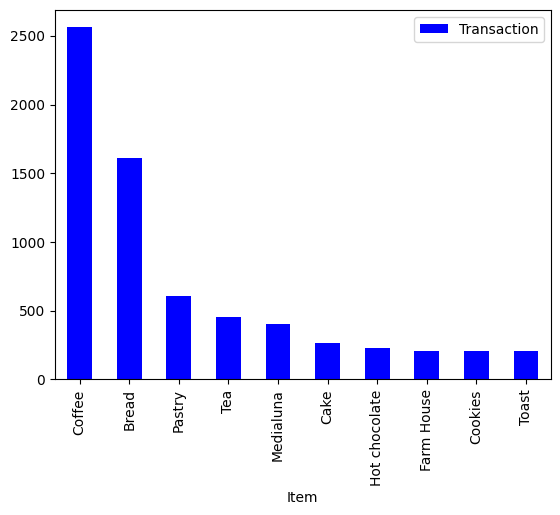

In [173]:
morning2=morning1.drop(["date_time","period_day","weekday_weekend","Month","month","day","hour"],axis=1)
morning3=morning2.head(10)
morning3.plot.bar(color='blue')

<AxesSubplot:xlabel='Item'>

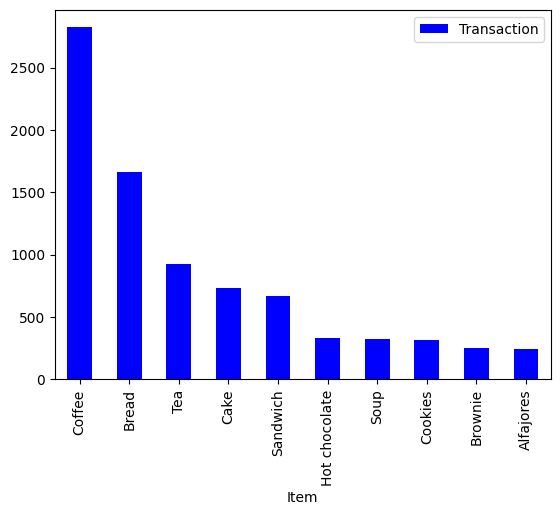

In [174]:
afternoon2=afternoon1.drop(["date_time","period_day","weekday_weekend","Month","month","day","hour"],axis=1)
afternoon3=afternoon2.head(10)
afternoon3.plot.bar(color='blue')

<AxesSubplot:xlabel='Item'>

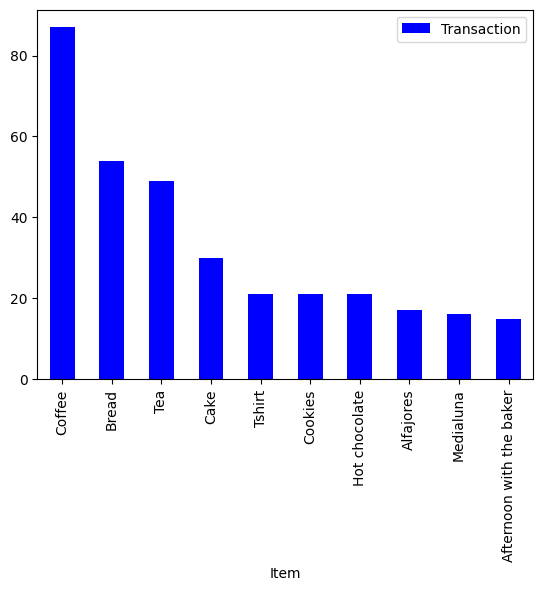

In [175]:
evening2=evening1.drop(["date_time","period_day","weekday_weekend","Month","month","day","hour"],axis=1)
evening3=evening2.head(10)
evening3.plot.bar(color='blue')

<AxesSubplot:xlabel='Item'>

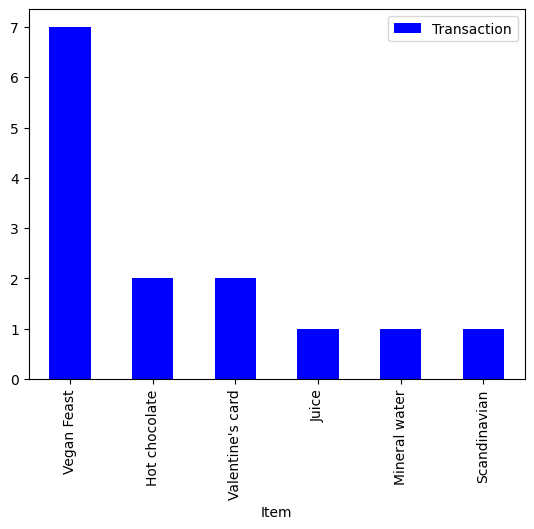

In [176]:
night2=night1.drop(["date_time","period_day","weekday_weekend","Month","month","day","hour"],axis=1)
night3=night2.head(10)
night3.plot.bar(color='blue')

## Apriori Algorithm Implementation

In [4]:
data["Transaction"].value_counts() #There are 6716 different transactions with a maximum purchase of 11 items

6716    11
6279    11
6474    11
6412    11
6045    10
        ..
4495     1
4494     1
4492     1
4491     1
9684     1
Name: Transaction, Length: 9465, dtype: int64

In [18]:
l=[]
l1=[]

count=0

for c in range(1,6717):
    for i in data["Transaction"]:
        if i>c:
            l.append(l1)
            l1=[]
            break
        elif i==c:
            l1.append(data["Item"][count])
            count=count+1
            
            
            
        
            
print(l)   
            

[['Bread'], ['Scandinavian', 'Scandinavian'], ['Hot chocolate', 'Jam', 'Cookies'], ['Muffin'], ['Coffee', 'Pastry', 'Bread'], ['Medialuna', 'Pastry', 'Muffin'], ['Medialuna', 'Pastry', 'Coffee', 'Tea'], ['Pastry', 'Bread'], ['Bread', 'Muffin'], ['Scandinavian', 'Medialuna'], ['Bread', 'Medialuna', 'Bread'], ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'], ['Basket', 'Bread', 'Coffee'], ['Bread', 'Medialuna', 'Pastry'], ['Mineral water', 'Scandinavian'], ['Bread', 'Medialuna', 'Coffee'], ['Hot chocolate'], ['Farm House'], ['Farm House', 'Bread'], ['Bread', 'Medialuna'], ['Coffee', 'Coffee', 'Medialuna', 'Bread'], ['Jam'], ['Scandinavian', 'Muffin'], ['Bread'], ['Scandinavian'], ['Fudge'], ['Scandinavian'], ['Coffee', 'Bread'], ['Bread', 'Jam'], ['Bread'], ['Basket'], ['Scandinavian', 'Muffin'], ['Coffee'], ['Coffee', 'Muffin'], ['Muffin', 'Scandinavian'], ['Tea', 'Bread'], ['Coffee', 'Bread'], ['Bread', 'Tea'], ['Scandinavian'], ['Juice', 'Tartine', 'Coffee', 'Muffin'], ['Scandinavian'], 

In [27]:
association_rules=apriori(l,min_support=0.0007,min_confidence=0.20,min_lift=3,min_length=2)
association_results=list(association_rules)

In [28]:
print(len(association_results))

52


In [29]:
association_results[0]

RelationRecord(items=frozenset({'Art Tray', 'Sandwich'}), support=0.001042287075640262, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Art Tray'}), items_add=frozenset({'Sandwich'}), confidence=0.21875, lift=3.523081534772182)])

In [31]:
results=[]
for item in association_results:
    pair=item[0]
    items=[x for x in pair]
    
    
    value0=str(items[0])
    value1=str(items[1])
    value2=str(item[2])
    value3=str(item[2][0][2])[:7]
    value4=str(item[2][0][3])[:7]
    
    rows=(value0,value1,value2,value3,value4)
    
    results.append(rows)
    
    Label=["Title1","Title2","Support","Confidence","Lift"]
    store_data=pd.DataFrame.from_records(results,columns=Label)
    print(store_data)

     Title1    Title2                                            Support  \
0  Art Tray  Sandwich  [OrderedStatistic(items_base=frozenset({'Art T...   

  Confidence     Lift  
0    0.21875  3.52308  
     Title1    Title2                                            Support  \
0  Art Tray  Sandwich  [OrderedStatistic(items_base=frozenset({'Art T...   
1      Coke  Sandwich  [OrderedStatistic(items_base=frozenset({'Coke'...   

  Confidence     Lift  
0    0.21875  3.52308  
1    0.24299  3.91348  
     Title1    Title2                                            Support  \
0  Art Tray  Sandwich  [OrderedStatistic(items_base=frozenset({'Art T...   
1      Coke  Sandwich  [OrderedStatistic(items_base=frozenset({'Coke'...   
2    Crisps     Juice  [OrderedStatistic(items_base=frozenset({'Crisp...   

  Confidence     Lift  
0    0.21875  3.52308  
1    0.24299  3.91348  
2        0.5  15.9904  
     Title1                  Title2  \
0  Art Tray                Sandwich   
1      Coke        

# Item Pairs in order of confidence

In [177]:
store=store_data.sort_values(by="Confidence",ascending=False)
store

,Title1,Title2,Support,Confidence,Lift
6,Tshirt,Postcard,[OrderedStatistic(items_base=frozenset({'Postc...,0.6,191.885
22,Cake,Tea,[OrderedStatistic(items_base=frozenset({'Cake'...,0.52631,3.76436
26,Crisps,Coffee,[OrderedStatistic(items_base=frozenset({'Crisp...,0.5,31.3831
2,Crisps,Juice,[OrderedStatistic(items_base=frozenset({'Crisp...,0.5,15.9904
15,Bread,Coke,[OrderedStatistic(items_base=frozenset({'Bread...,0.5,8.05275
10,Alfajores,Juice,[OrderedStatistic(items_base=frozenset({'Alfaj...,0.47058,15.0498
44,Sandwich,Medialuna,[OrderedStatistic(items_base=frozenset({'Sandw...,0.46153,3.30105
14,Bread,Chicken Stew,[OrderedStatistic(items_base=frozenset({'Bread...,0.45454,3.25104
43,Muffin,Juice,[OrderedStatistic(items_base=frozenset({'Muffi...,0.42857,3.06526
19,Bread,Tiffin,[OrderedStatistic(items_base=frozenset({'Bread...,0.42105,3.01149


In [186]:
store1=store.drop(["Support","Lift"],axis=1)
store1["Item_Pair"]=store1["Title1"].str.cat(store1["Title2"],sep=',')
store2=store1.drop(["Title1","Title2"],axis=1)
store2

,Confidence,Item_Pair
6,0.6,"Tshirt,Postcard"
22,0.52631,"Cake,Tea"
26,0.5,"Crisps,Coffee"
2,0.5,"Crisps,Juice"
15,0.5,"Bread,Coke"
10,0.47058,"Alfajores,Juice"
44,0.46153,"Sandwich,Medialuna"
14,0.45454,"Bread,Chicken Stew"
43,0.42857,"Muffin,Juice"
19,0.42105,"Bread,Tiffin"
